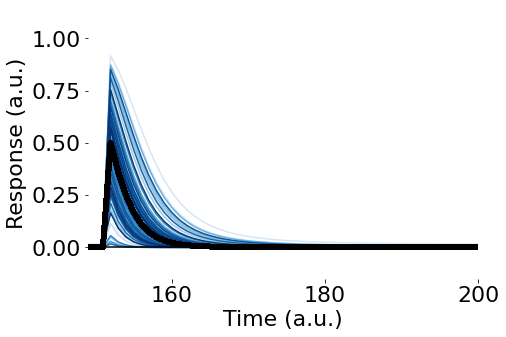

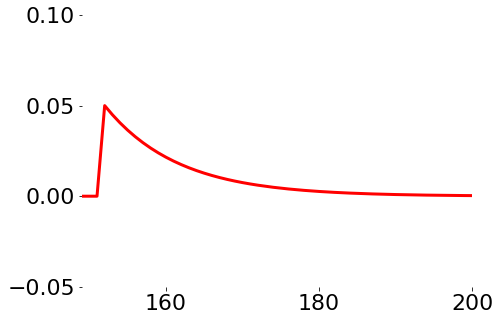

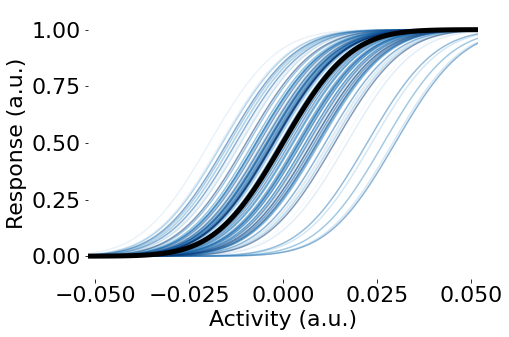

In [ ]:
#resonse function of neurons

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal
from scipy.fft import fftshift

import networkx as nx
import numpy as np
import pandas as pd

T = 300
dt=0.1
N=100
d=-1
beta=50
D =0.000

def F(u,h):
  output =0.5*(1+special.erf(beta*(u+h)))#np.tanh(beta*u)# 1/(1+np.exp(-beta*u))
  return output
response=np.zeros((N,T))
response2=np.zeros((N,T))
Input = np.zeros(T)
time=np.arange(0,T,1)
threshold = np.zeros(N)
for i in range(N):

  # threshold[i] = 0.05*np.random.normal(0,1)
    threshold[i] = 0.01*np.random.normal(0,1)
for t in range(T-1):
 
  if (t>T/2 and t<T/2+2):
    I=0.0+0.05/dt
  else:
    I=0.0
  Input[t+1]=Input[t]+dt*(-Input[t]+I)
  for i in range(N):
    response[i][t] = F(Input[t]-0.05,threshold[i])
    response2[i][t] = F(Input[t]-0.05,0)


plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 22})

colormap = plt.cm.gist_ncar
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, N))))
for i in range(N):
    plt.plot(time,response[i][:])
for i in range(N):
    plt.plot(time,response2[i][:],color="black", linewidth=5)

plt.plot(time,np.zeros(len(time)),color='black')
plt.ylim(-0.15, 1.15) 
# plt.xlim(0, T) 
plt.xlim(T/2-1, T/2+50) 
plt.xlabel('Time (a.u.)')
plt.ylabel('Response (a.u.)')
plt.show()

plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 22})

colormap = plt.cm.gist_ncar
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.plot(time,Input,color='red',linewidth=3)
plt.xlim(T/2-1, T/2+50) 
plt.ylim(-0.05, 0.1) 
plt.show()

plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 22})
x=np.arange(-1,1,0.001)

plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, N))))
for i in range(N):
    plt.plot(x,F(x,threshold[i]),alpha=0.5)
plt.plot(x,F(x,0),color="black", linewidth=5)

#sns.distplot(threshold, kde=True, bins=100, hist=False)

# _, _, bars = plt.hist(threshold, bins = 300, color="gray",alpha=0.5)
plt.xlabel('Activity (a.u.)')
plt.ylabel('Response (a.u.)')
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.ylim(-0.1, 1.1) 
plt.xlim(-0.052, 0.052) 
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(-0.5, 0.5)

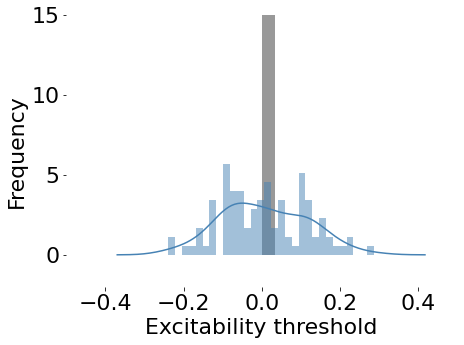

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal
from scipy.fft import fftshift

import networkx as nx
import numpy as np
import pandas as pd

T = 300
dt=0.1
N=100
d=-1
beta=50
D =0.000

threshold1 = np.zeros(N)
threshold2 = np.zeros(N)
threshold3 = np.zeros(N)
for i in range(N):

    threshold1[i] = 0.0*np.random.normal(0,1)
    threshold2[i] = 0.1*np.random.normal(0,1)
    threshold3[i] = 0.1*np.random.normal(0,1)
BINS = 30
plt.figure(figsize=(7,5))
plt.rcParams.update({'font.size': 22})
sns.distplot(threshold1,kde=True, bins = BINS, color = 'Black')
# _, _, bars = plt.hist(threshold1, bins = 100, color="blue",alpha=0.25)


for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)




sns.distplot(threshold2,kde=True, bins = BINS,  color ='steelblue',hist_kws=dict(alpha=0.5))
# _, _, bars = plt.hist(threshold1, bins = 100, color="blue",alpha=0.25)
plt.xlabel('Excitability threshold')

plt.ylabel('Frequency')
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.ylim(-2, 15) 
plt.xlim(-0.5, 0.5) 


# plt.figure(figsize=(7,5))
# plt.rcParams.update({'font.size': 22})

# sns.distplot(threshold3,kde=True, bins = BINS, color ='darkblue',hist_kws=dict(alpha=0.5))
# # _, _, bars = plt.hist(threshold1, bins = 100, color="blue",alpha=0.25)
# plt.xlabel('Excitability threshold')
# plt.ylabel('Frequency')
# for pos in ['right', 'top', 'bottom', 'left']:
#    plt.gca().spines[pos].set_visible(False)
# plt.ylim(-2, 10) 
# plt.xlim(-0.5, 0.5) 
# plt.show()




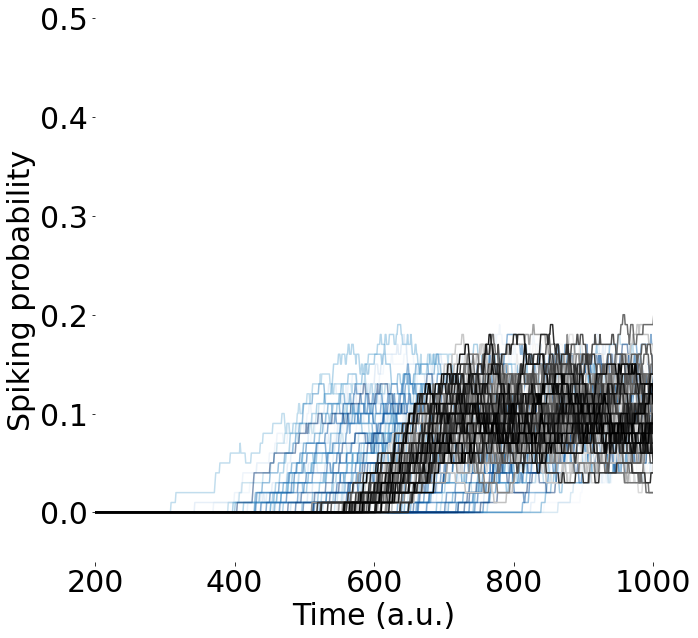

In [ ]:
T = 1200
N=100
# threshold = np.arange(-0.1,0.1,0.2/N)
threshold =  0.05*np.random.normal(0,1, size=N)
Spikes = np.zeros((N,T))
Spikes_homo = np.zeros((N,T))
time=np.arange(0,T,1)
S = np.arange(-0.2,0.3,0.5/len(time))
for i in range(N):
  for t in range(len(S)):
    prob = np.random.uniform(0,1)
    if (prob<(1-np.exp(-F(S[t]-0.05, threshold[i])*dt))):
      Spikes[i][t]=1
    else:
      Spikes[i][t]=0;  
for i in range(N):
  for t in range(len(S)):
    prob = np.random.uniform(0,1)
    if (prob<(1-np.exp(-F(S[t]-0.05, 0)*dt))):
      Spikes_homo[i][t]=1
    else:
      Spikes_homo[i][t]=0;  
neuron = []
spiketime = []
neuron_homo = []
spiketime_homo = []
t_window=100
firing_rate = np.zeros((N,T))
firing_rate_homo = np.zeros((N,T))
for t in range(len(time)-t_window):
  for i in range(N):
    for s in range(t_window):
      if (Spikes[i][t-int(t_window/2)+s]>0.1):
        firing_rate[i][t+int(t_window/2)]=firing_rate[i][t+int(t_window/2)]+1/t_window
for t in range(len(time)-1):
  for i in range(N):
    if (Spikes[i][t]>0.1):
      neuron.append(i)
      spiketime.append(t)

for t in range(len(time)-t_window):
  for i in range(N):
    for s in range(t_window):
      if (Spikes_homo[i][t-int(t_window/2)+s]>0.1):
        firing_rate_homo[i][t+int(t_window/2)]=firing_rate_homo[i][t+int(t_window/2)]+1/t_window
for t in range(len(time)-1):
  for i in range(N):
    if (Spikes_homo[i][t]>0.1):
      neuron_homo.append(i)
      spiketime_homo.append(t)

plt.rcParams.update({'font.size': 30})

# plt.figure(figsize=(40,10))  
# # plt.plot(spiketime,neuron,'|',markersize=50,linewidth=3, color='Black');
# for pos in ['right', 'top', 'bottom', 'left']:
#    plt.gca().spines[pos].set_visible(False)
# plt.xlim(200,1200)
# plt.show()

plt.figure(figsize=(10,10))
plt.rcParams.update({'font.size': 30})
# plt.plot(spiketime,neuron,'|',markersize=50,linewidth=3, color='Black');
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
x=np.arange(-1,1,0.001)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, N))))
for i in range(N):
    plt.plot(time,firing_rate[i][:],alpha=0.5)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Greys(np.linspace(0, 1, N))))
for i in range(N):
    plt.plot(time,firing_rate_homo[i][:]) 
plt.xlim(200,1000)
plt.ylim(-0.05,0.5)
plt.xlabel('Time (a.u.)')
plt.ylabel('Spiking probability')
plt.show()

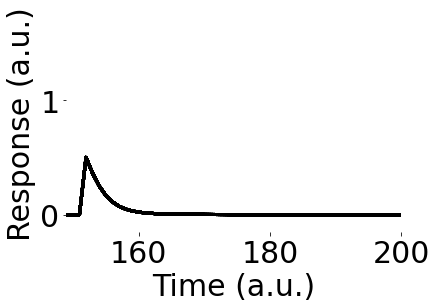

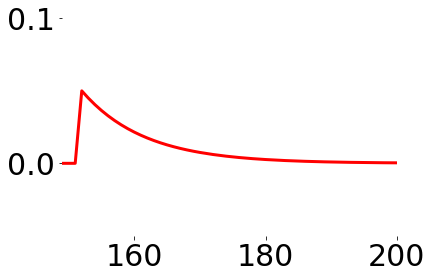

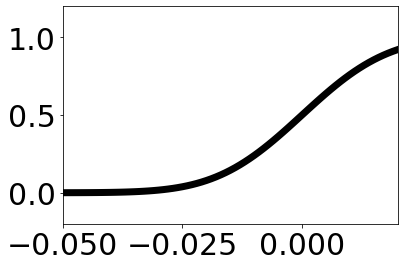

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


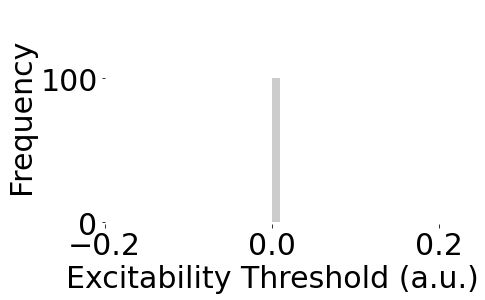

In [ ]:

#resonse function of neurons

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import special
from scipy.stats import norm
from scipy.stats import pearsonr
from scipy import signal
from scipy.fft import fftshift

import networkx as nx
import numpy as np
import pandas as pd

T = 300
dt=0.1
N=100
d=-1
beta=50
D =0.000

def F(u,h):
  output =0.5*(1+special.erf(beta*(u+h)))#np.tanh(beta*u)# 1/(1+np.exp(-beta*u))
  return output
response=np.zeros((N,T))
response_homo = np.zeros((N,T))
Input = np.zeros(T)
time=np.arange(0,T,1)
threshold = np.zeros(N)
for i in range(N):

  # threshold[i] = 0.05*np.random.normal(0,1)
    threshold[i] = 0.0*np.random.normal(0,1)
for t in range(T-1):
 
  if (t>T/2 and t<T/2+2):
    I=0.0+0.05/dt
  else:
    I=0.0
  Input[t+1]=Input[t]+dt*(-Input[t]+I)
  for i in range(N):
    response[i][t] = F(Input[t]-0.05,threshold[i])
    response_homo[i][t] = F(Input[t]-0.05,0)



plt.rcParams.update({'font.size': 30})

colormap = plt.cm.gist_ncar

for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, N))))
for i in range(N):
    plt.plot(time,response[i][:])
for i in range(N):
    plt.plot(time,response_homo[i][:],linewidth=3, color="Black")
# plt.plot(time,np.zeros(len(time)),color='black')
plt.ylim(-0.15, 1.75) 
# plt.xlim(0, T) 
plt.xlim(T/2-1, T/2+50) 
plt.xlabel('Time (a.u.)')
plt.ylabel('Response (a.u.)')
plt.show()



plt.rcParams.update({'font.size': 30})

colormap = plt.cm.gist_ncar
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.plot(time,Input,color='red',linewidth=3)
plt.xlim(T/2-1, T/2+50) 
plt.ylim(-0.05, 0.1) 
plt.show()



plt.rcParams.update({'font.size': 30})
x=np.arange(-1,1,0.001)
plt.gca().set_prop_cycle(plt.cycler('color', plt.cm.Blues(np.linspace(0, 1, N))))
for i in range(N):
    plt.plot(x,F(x,threshold[i]),alpha=0.5)
plt.plot(x,F(x,0), linewidth=7, color="Black")
plt.ylim(-0.2, 1.2) 
plt.xlim(-0.05, 0.02) 
plt.show()
sns.distplot(threshold, kde=True, color="gray", bins=100, hist=True)
# sns.distplot(threshold, kde=True, bins=100, hist=True)
# _, _, bars = plt.hist(threshold, bins = 20, color="gray",alpha=0.5)
plt.xlabel('Excitability Threshold (a.u.)')
plt.ylabel('Frequency')
for pos in ['right', 'top', 'bottom', 'left']:
   plt.gca().spines[pos].set_visible(False)
plt.ylim(-1, 150) 
# plt.ylim(-1, 25) 
plt.xlim(-0.2, 0.2) 
plt.show()